Prac

In [2]:
import pandas as pd
import numpy as np
#sklearn.preprocessing 의 scale:스케일 조정 패키지
from sklearn.preprocessing import scale
#서포트 벡터 머신 모델 패키지 불러오기
from sklearn.svm import SVC 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함


['NanumBarunGothic']


In [3]:
df_hmeq = pd.read_csv("../data/HMEQ.csv",encoding = "euc-kr")
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df_hmeq.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_hmeq["JOB"].fillna("Other",inplace = True)
df_hmeq.fillna(df_hmeq.mean(),inplace = True)

In [6]:
# 더미변수 생성
df_hmeq_dummy = pd.get_dummies(df_hmeq)
df_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
np.random.seed(seed = 1234)
msk = np.random.rand(df_hmeq_dummy.shape[0])<0.7
df_hmeq_train = df_hmeq_dummy[msk]
df_hmeq_test = df_hmeq_dummy[~msk]

df_hmeq_train_y = df_hmeq_train["BAD"]
df_hmeq_train_x = df_hmeq_train.drop("BAD",axis = 1, inplace = False)
df_hmeq_test_y = df_hmeq_test["BAD"]
df_hmeq_test_x = df_hmeq_test.drop("BAD",axis = 1, inplace = False)

print("train data X size :{}".format(df_hmeq_train_x.shape))
print("train data Y size :{}".format(df_hmeq_train_y.shape))

print("test data X size :{}".format(df_hmeq_test_x.shape))
print("test data Y size :{}".format(df_hmeq_test_y.shape))


train data X size :(2604, 18)
train data Y size :(2604,)
test data X size :(1144, 18)
test data Y size :(1144,)


In [8]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_hmeq_train_x,df_hmeq_train_y)

print("accuracy on train set: {:.3f}".format(svm_uncustomized.score(df_hmeq_train_x,df_hmeq_train_y)))
print("accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_hmeq_test_x,df_hmeq_test_y)))


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy on train set: 1.000
accuracy on test set: 0.910


In [9]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
# svm
train_accuracy = []
test_accuracy = []
para_C = []
for C in range(10):
    svm1 = SVC(C= (C+1)/10, random_state = 1234)
    svm1.fit(df_hmeq_train_x,df_hmeq_train_y)
    para_C.append((C+1)/10)
    train_accuracy.append(svm1.score(df_hmeq_train_x,df_hmeq_train_y))
    test_accuracy.append(svm1.score(df_hmeq_test_x,df_hmeq_test_y))

df_accuracy1 = pd.DataFrame()
df_accuracy1["C"] = para_C
df_accuracy1["TrainAccuracy"] = train_accuracy
df_accuracy1["TestAccuracy"] = test_accuracy
df_accuracy1

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,TestAccuracy
0,0.1,0.907066,0.909965
1,0.2,0.907066,0.909965
2,0.3,0.907066,0.909965
3,0.4,0.907066,0.909965
4,0.5,0.907066,0.909965
5,0.6,0.907066,0.909965
6,0.7,0.907066,0.909965
7,0.8,0.907066,0.909965
8,0.9,0.907066,0.909965
9,1.0,1.000000,0.909965


In [11]:
df_accuracy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.907,0.91
1,0.2,0.907,0.91
2,0.3,0.907,0.91
3,0.4,0.907,0.91
4,0.5,0.907,0.91
5,0.6,0.907,0.91
6,0.7,0.907,0.91
7,0.8,0.907,0.91
8,0.9,0.907,0.91
9,1.0,1.000,0.91


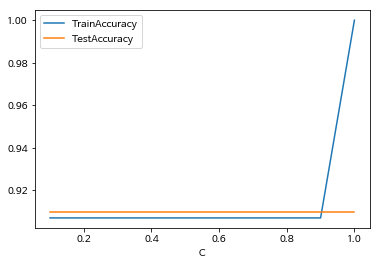

In [12]:
df_accuracy1.set_index("C",inplace = False).plot.line()

In [14]:
# svm
train_accuracy = []
test_accuracy = []
para_gamma = []
for gamma in range(1,10):
    svm2 = SVC(gamma = gamma/10, random_state = 1234)
    svm2.fit(df_hmeq_train_x,df_hmeq_train_y)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2.score(df_hmeq_train_x,df_hmeq_train_y))
    test_accuracy.append(svm2.score(df_hmeq_test_x,df_hmeq_test_y))

df_accuracy2 = pd.DataFrame()
df_accuracy2["Gamma"] = para_gamma
df_accuracy2["TrainAccuracy"] = train_accuracy
df_accuracy2["TestAccuracy"] = test_accuracy
df_accuracy2

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.909965
1,0.2,1.0,0.909965
2,0.3,1.0,0.909965
3,0.4,1.0,0.909965
4,0.5,1.0,0.909965
5,0.6,1.0,0.909965
6,0.7,1.0,0.909965
7,0.8,1.0,0.909965
8,0.9,1.0,0.909965


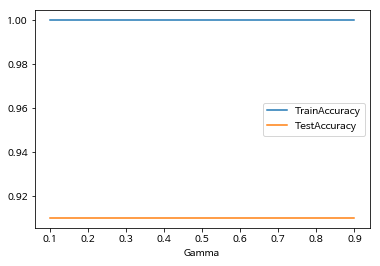

In [15]:
df_accuracy2.set_index("Gamma",inplace = False).plot.line()

In [16]:
df_hmeq_train_x_scaled = scale(df_hmeq_train_x,axis = 0)
df_hmeq_test_x_scaled = scale(df_hmeq_test_x,axis = 0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


In [17]:
svm_uncustomized_scaled = SVC(random_state= 1234)
svm_uncustomized_scaled.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)

print("train 정확도: {:.3f}".format(svm_uncustomized_scaled.score(df_hmeq_train_x_scaled,df_hmeq_train_y)))
print("test 정확도: {:.3f}".format(svm_uncustomized_scaled.score(df_hmeq_test_x_scaled,df_hmeq_test_y)))


train 정확도: 0.941
test 정확도: 0.934


In [21]:
# svm
train_accuracy = []
test_accuracy = []
para_C = []
for C in range(15):
    svm1_scaled = SVC(C= (C+1)/10, random_state = 1234)
    svm1_scaled.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)
    para_C.append(C+1)
    train_accuracy.append(svm1_scaled.score(df_hmeq_train_x_scaled,df_hmeq_train_y))
    test_accuracy.append(svm1_scaled.score(df_hmeq_test_x_scaled,df_hmeq_test_y))

df_accuracy1_scaled = pd.DataFrame()
df_accuracy1_scaled["C"] = para_C
df_accuracy1_scaled["TrainAccuracy"] = train_accuracy
df_accuracy1_scaled["TestAccuracy"] = test_accuracy
df_accuracy1_scaled.round(3)

,C,TrainAccuracy,TestAccuracy
0,1,0.907,0.910
1,2,0.908,0.911
2,3,0.921,0.914
3,4,0.930,0.920
4,5,0.933,0.925
5,6,0.936,0.925
6,7,0.937,0.927
7,8,0.939,0.928
8,9,0.940,0.929
9,10,0.941,0.934


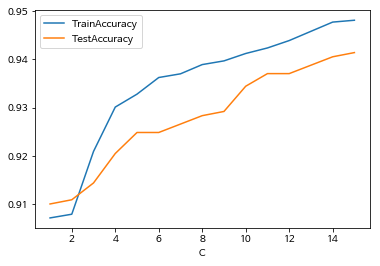

In [22]:
df_accuracy1_scaled.set_index("C",inplace = False).plot.line()

In [23]:
train_accuracy = []
test_accuracy = []
para_gamma = []

for gamma in range(1,10):
    svm2_scaled = SVC(gamma = gamma/10, random_state = 1234)
    svm2_scaled.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2_scaled.score(df_hmeq_train_x_scaled,df_hmeq_train_y))
    test_accuracy.append(svm2_scaled.score(df_hmeq_test_x_scaled,df_hmeq_test_y)) 

df_accuracy2_scaled = pd.DataFrame()
df_accuracy2_scaled["Gamma"] = para_gamma
df_accuracy2_scaled["TrainAccuracy"] = train_accuracy
df_accuracy2_scaled["TestAccuracy"] = test_accuracy


In [24]:
df_accuracy2_scaled

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.956605,0.941434
1,0.2,0.969662,0.930944
2,0.3,0.977727,0.922203
3,0.4,0.980799,0.920455
4,0.5,0.984639,0.919580
5,0.6,0.986943,0.919580
6,0.7,0.988863,0.919580
7,0.8,0.990783,0.918706
8,0.9,0.992320,0.918706


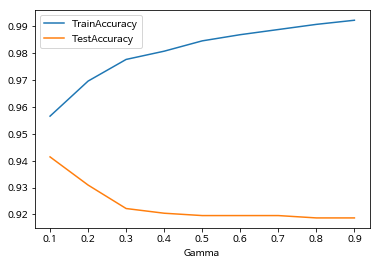

In [25]:
df_accuracy2_scaled.set_index("Gamma",inplace = False).plot.line()

In [28]:
svm3 = SVC(C = 10, gamma = 0.4, random_state = 1234)
svm3.fit(df_hmeq_train_x_scaled,df_hmeq_train_y)

train_accuracy =svm3.score(df_hmeq_train_x_scaled,df_hmeq_train_y)
test_accuracy = svm3.score(df_hmeq_test_x_scaled,df_hmeq_test_y)

print("train accuracy = {:.3fx_test_scaled}".format(train_accuracy))
print("test accuracy = {:.3f}".format(test_accuracy))


train accuracy = 0.999
test accuracy = 0.934
